# 01 Pre processing dataset

### About the dataset

Every row contains data from one ECG (2000 point, 250 Hz). Each row has a label (0, 3).
The proposed task is to develop a model to classify each ECG in one of the 4 classes.

Context
I have created this dataset to help me in developing a DL model to analyze ECG taken from a wearable device.

Content
Data are taken from Physionet 2017 site challenge. https://physionet.org/content/challenge-2017/1.0.0/
The csv file contains 8528 ECG tracks, each 2000 points, taken from the Physionet2017 dataset

Data have been provided by AliveCor.

Acknowledgements
Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., … & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

Import the dataset from Google Drive, this line of code link Google Drive with Googla Colab Jupyter Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the necessary modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The signal are contained in a csv files, where each row it's a ECG signal

In [ ]:
path = r"/content/drive/MyDrive/Detección de cardiopatías/"
file_name = "physionet2017.csv"

df = pd.read_csv(path + file_name)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,name,label
0,0.035032,0.037155,0.044586,0.063694,0.076433,0.085987,0.089172,0.083864,0.072187,0.061571,0.049894,0.039278,0.029724,0.013800,-0.003185,-0.010616,-0.014862,-0.018047,-0.021231,-0.023355,-0.024416,-0.024416,-0.024416,-0.023355,-0.022293,-0.021231,-0.018047,-0.014862,-0.009554,0.000000,0.018047,0.055202,0.110403,0.187898,0.288747,0.407643,0.540340,0.673036,0.788747,0.860934,...,-0.005308,-0.007431,-0.008493,-0.009554,-0.009554,-0.009554,-0.009554,-0.008493,-0.007431,-0.007431,-0.007431,-0.007431,-0.008493,-0.008493,-0.010616,-0.008493,0.002123,0.014862,0.027601,0.041401,0.054140,0.065817,0.070064,0.072187,0.074310,0.076433,0.074310,0.057325,0.038217,0.020170,0.008493,0.000000,-0.007431,-0.012739,-0.015924,-0.019108,-0.023355,-0.022293,A00/A00001,0
1,-0.035288,-0.032573,-0.030945,-0.029859,-0.031488,-0.034202,-0.037459,-0.040717,-0.043974,-0.047231,-0.051031,-0.053746,-0.054832,-0.054289,-0.051574,-0.047774,-0.043431,-0.037459,-0.027687,-0.019544,-0.014115,-0.009229,-0.005429,-0.003257,-0.002714,-0.004886,-0.008686,-0.012486,-0.016287,-0.021716,-0.025516,-0.026059,-0.023344,-0.019001,-0.013029,-0.004886,0.000543,0.004886,0.008143,0.010315,...,0.005972,0.000000,-0.001629,-0.002714,-0.003800,-0.004886,-0.005972,-0.006515,-0.007058,-0.007600,-0.008143,-0.008143,-0.008686,-0.009229,-0.009772,-0.009772,-0.009229,-0.009229,-0.009229,-0.008686,-0.008686,-0.008143,-0.007600,-0.006515,-0.005972,-0.005429,-0.004886,-0.004343,-0.003800,-0.002714,-0.001629,-0.001086,-0.000543,-0.000543,0.000000,0.000000,0.000543,0.001086,A00/A00002,0
2,-0.303922,-0.261438,-0.222222,-0.192810,-0.176471,-0.163399,-0.147059,-0.130719,-0.117647,-0.107843,-0.094771,-0.084967,-0.071895,-0.058824,-0.039216,-0.006536,0.052288,0.088235,0.111111,0.124183,0.133987,0.137255,0.133987,0.124183,0.114379,0.101307,0.094771,0.081699,0.071895,0.062092,0.052288,0.045752,0.035948,0.029412,0.019608,0.006536,0.000000,-0.006536,0.000000,0.016340,...,0.179739,0.176471,0.169935,0.156863,0.140523,0.120915,0.101307,0.075163,0.045752,0.022876,0.000000,-0.029412,-0.062092,-0.084967,-0.107843,-0.137255,-0.169935,-0.209150,-0.228758,-0.241830,-0.254902,-0.267974,-0.277778,-0.287582,-0.294118,-0.300654,-0.310458,-0.316993,-0.330065,-0.339869,-0.346405,-0.339869,-0.323529,-0.297386,-0.264706,-0.209150,-0.117647,-0.065359,A00/A00003,0
3,0.109467,0.117604,0.128698,0.142012,0.153107,0.161982,0.170118,0.176036,0.181213,0.184911,0.187130,0.190828,0.193787,0.196006,0.198225,0.198964,0.197485,0.194527,0.190089,0.184172,0.177515,0.167160,0.148669,0.133136,0.116864,0.101331,0.085059,0.072485,0.061391,0.049556,0.036982,0.025888,0.016272,0.007396,0.000000,-0.007396,-0.012574,-0.017751,-0.022189,-0.026627,...,-0.014793,-0.016272,-0.018491,-0.020710,-0.023669,-0.026627,-0.029586,-0.033284,-0.036982,-0.039941,-0.042160,-0.045118,-0.048817,-0.054734,-0.062870,-0.067308,-0.071006,-0.073964,-0.071746,-0.059172,-0.025148,0.031065,0.114645,0.225592,0.358728,0.506657,0.652367,0.777367,0.844675,0.846154,0.780325,0.640533,0.467456,0.298077,0.165680,0.085799,0.012574,0.013314,A00/A00004,1
4,-0.019856,-0.017148,-0.014440,-0.011733,-0.009928,-0.008123,-0.006318,-0.004513,-0.003610,-0.001805,0.000000,0.000903,0.002708,0.004513,0.005415,0.006318,0.008123,0.009025,0.010830,0.010830,0.011733,0.011733,0.012635,0.013538,0.014440,0.015343,0.016245,0.017148,0.018051,0.018953,0.020758,0.022563,0.023466,0.025271,0.026173,0.029783,0.036101,0.027076,0.018051,0.011733,...,-0.074910,-0.061372,-0.024368,0.036101,0.128159,0.258123,0.421480,0.600181,0.763538,0.851083,0.849278,0.750000,0.520758,0.222924,-0.075812,-0.305957,-0.414260,-0.434116,-0.423285,-0.408845,-0.404332,-0.416968,-0.431408,-0.443141,-0.443141,-0.434116,

In [ ]:
print("The numbers of ECG signals: {} and each signal has: {} samples".format(df.shape[0], df.shape[1] - 2))
print("The categorical classes of ECG: {}".format(df["label"].unique()))
print("Numbers of signals for each class")
print(df["label"].value_counts())

The numbers of ECG signals: 8528 and each signal has: 2000 samples
The categorical classes of ECG: [0 1 2 3]
Numbers of signals for each class
0    5076
2    2415
1     758
3     279
Name: label, dtype: int64


**Classes**

* 0 --> "Normal rhythm"
* 1 --> "AF rhythm"
* 2 --> "Other rhythm"
* 3 --> "Noisy recording"

Looking for **missing** values in the dataset

In [ ]:
missing_data = df.isnull()
columns_missing_data = []
for column in df.columns.values.tolist():
  columnn_missing_data = missing_data[column].value_counts()
  if len(columnn_missing_data) == 2:
    print(column)
    print(columnn_missing_data)
    print("")
    columns_missing_data.append(column)

if len(columns_missing_data) == 0:
  print("none of the columns have missing values")
else:
  print("These columns have missing data:")
  print(columns_missing_data)

none of the columns have missing values


Great!, the dateset does not have missing values

Let's Separate the data in different arrays:

* X: the ecg signals
* y: label class 

In [ ]:
y = np.asanyarray(df["label"])
print(np.unique(y))
print(y[0:5])

[0 1 2 3]
[0 0 0 1 1]


Now, Drops the columns that are not neccesary 
* Columns = "label" & "name"

In [ ]:
df.drop(columns = ["name", "label"], axis = 1, inplace = True)
X = np.asanyarray(df)

### Data Visualization of the dataset for each class

In [ ]:
#creating an array of samples
n = len(X[0])
samples = np.arange(0, n)

#class 0
x_0 = X[0]
#class 1
x_1 = X[4]
#class 2
x_2 = X[12]
#class 3
x_3 = X[21]

Text(0.5, 0, 'samples')

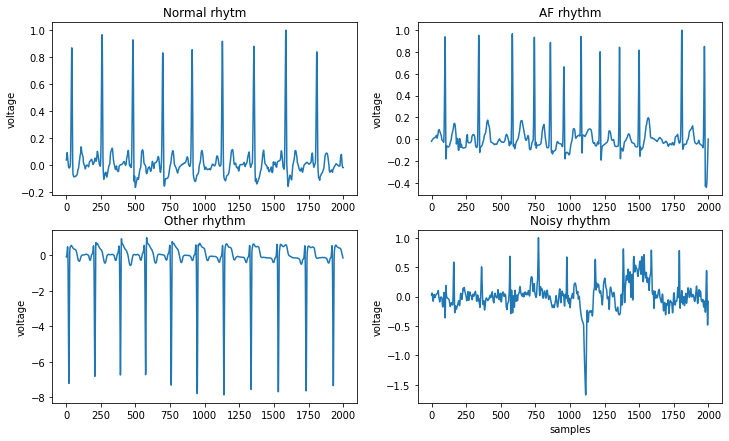

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (12, 7))

sns.lineplot(x = samples, y = x_0, ax = axes[0][0])
axes[0][0].set_title("Normal rhytm")
axes[0][0].set_ylabel("voltage")
sns.lineplot(x = samples, y = x_1, ax = axes[0][1])
axes[0][1].set_title("AF rhythm")
axes[0][1].set_ylabel("voltage")
sns.lineplot(x = samples, y = x_2, ax = axes[1][0])
axes[1][0].set_title("Other rhythm")
axes[1][0].set_ylabel("voltage")
axes[1][1].set_ylabel("samples")
sns.lineplot(x = samples, y = x_3, ax = axes[1][1])
axes[1][1].set_title("Noisy rhythm")
axes[1][1].set_ylabel("voltage")
axes[1][1].set_xlabel("samples")

In [ ]:
np.save("Target.npy", y)
np.save("ECG_signals.npy", X)